# Problem 3: Aorta Biomarkers analysis 

Manuel Jiménez Haro

Real Data (provided by Spanish Hospital) with geometrical aorta
biomarkers to analyze.

#### Genetic Pathology
**Visualize the biomarkers populations for genetic and control groups.**
- (Optional: Look for correlations between bm's and groups)

Clinically-Driven Virtual Patient Cohorts Generation: An Application to Aorta [Rom21] 
https://www.frontiersin.org/articles/10.3389/fphys.2021.713118/full

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('biomarcadores_geometricos_aorta.csv', sep=',', na_values=': ')
df.head()
list(df.columns.values)

['GENETICOS',
 'controles_o_BAV_o_MFN',
 'CODIGO_VH',
 'age',
 'Sex',
 'PES',
 'TALLAcm',
 'BSA_new',
 'SenoValsalva_MaxDiam_mm_RM',
 'Geometrical_analysis_is_performed',
 'STJ_diam',
 'AAo_at_pulmo_diam',
 'AAo_4dflow_max_diam',
 'DAo_4Dflow_max_diam',
 'prox_AAo_max_diam',
 'dist_AAo_max_diam',
 'first_supra_diam',
 'third_supra_diam',
 'Arch_max_diam',
 'desc_pulm_diam',
 'diaphr_diam',
 'prox_DAo_max_diam',
 'dist_DAo_max_diam',
 'AAo_mean_diam',
 'prox_AAo_mean_diam',
 'dist_AAo_mean_diam',
 'Arch_mean_diam',
 'DAo_mean_diam',
 'prox_DAo_mean_diam',
 'dist_DAo_mean_diam',
 'AAo_min_max_diam',
 'AAo_max_max_diam',
 'STJ_min_diam',
 'STJ_max_diam',
 'asc_pulm_min_diam',
 'asc_pulm_max_diam',
 'first_supra_min_diam',
 'first_supra_max_diam',
 'third_supra_min_diam',
 'third_supra_max_diam',
 'desc_pulm_min_diam',
 'desc_pulm_max_diam',
 'AAo_lenght',
 'prox_AAo_lenght',
 'dist_AAo_lenght',
 'Arch_lenght',
 'DAo_lenght',
 'prox_DAo_lenght',
 'dist_DAo_lenght',
 'AAo_tapering',
 'prox_

In [10]:
summary = df.describe()
summary = summary.transpose()
summary.head(100)

,count,mean,std,min,25%,50%,75%,max
GENETICOS,176.0,0.698864,0.460061,0.00,0.00,1.00,1.0000,1.00
controles_o_BAV_o_MFN,176.0,2.340909,2.458275,0.00,0.00,2.00,2.0000,8.00
age,168.0,37.278810,12.944186,15.33,27.00,36.00,45.0275,78.00
Sex,175.0,0.514286,0.501230,0.00,0.00,1.00,1.0000,1.00
PES,159.0,72.270440,14.554431,45.00,61.50,70.00,82.0000,115.00
...,...,...,...,...,...,...,...,...
placedist_AAo_max_curv,161.0,64.387391,34.660422,4.76,37.50,70.00,100.0000,100.00
Arch_max_curv,161.0,0.037516,0.008946,0.02,0.03,0.04,0.0400,0.06
placeArch_max_curv,161.0,63.801491,37.372027,5.88,23.08,75.00,100.0000,100.00
DAo_max_curv,161.0,0.040186,0.009518,0.02,0.03,0.04,0.0400,0.08


In [11]:
df_no_gen = df[df.GENETICOS.eq(0)]

df_gen = df[df.GENETICOS.eq(1)]

sin_na_df = df.dropna()

#quitamos estas columnas que no parecen tener datos relevantes -> tienen el mismo valor todo el rato o distinto valor para cada muestra
df1 = sin_na_df.drop(['CODIGO_VH','Geometrical_analysis_is_performed','ARCO_quale_forma_viene'],  axis=1)

df1_no_gen = df1[df1.GENETICOS.eq(0)]

df1_gen = df1[df1.GENETICOS.eq(1)]

In [12]:
df_dict = {"no":df1_no_gen, "gen":df1_gen}
for name, df in df_dict.items():
   df.columns = df.columns + "_" + name

In [16]:
columns_gen = list(df1_gen.columns)
columns_no = list(df1_no_gen.columns)
columns= columns_gen + columns_no
columns = sorted(columns)

C:\Users\Usuario\AppData\Local\Temp/ipykernel_15500/24454065.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()   # plots figure for each iteration


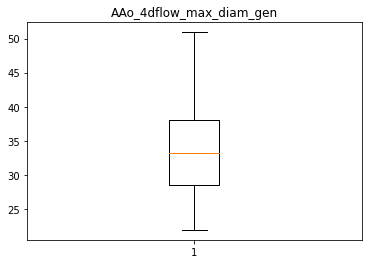

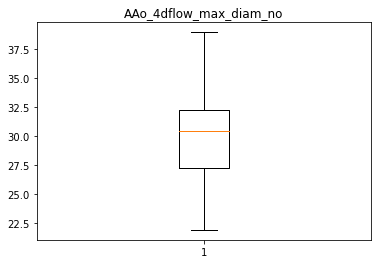

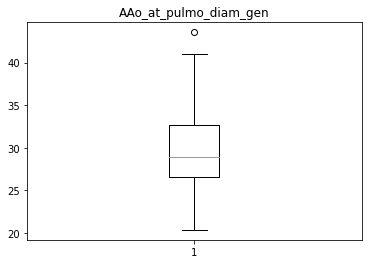

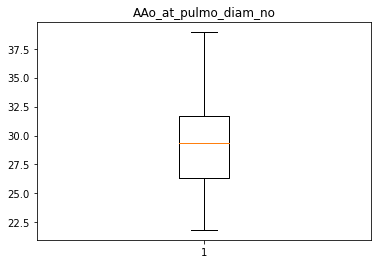

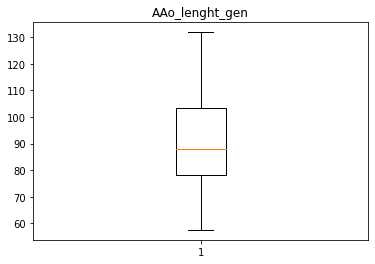

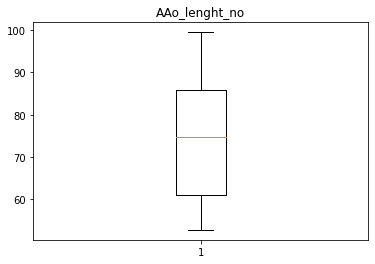

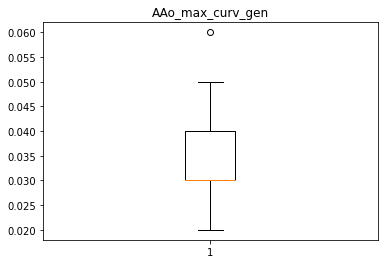

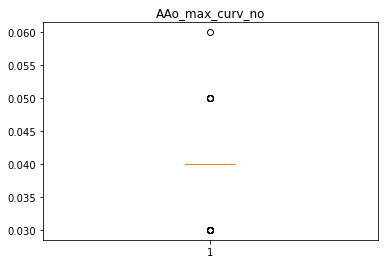

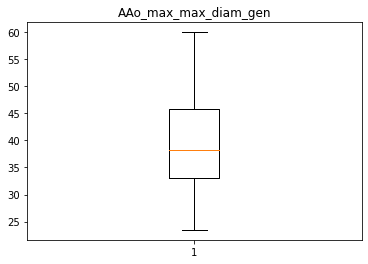

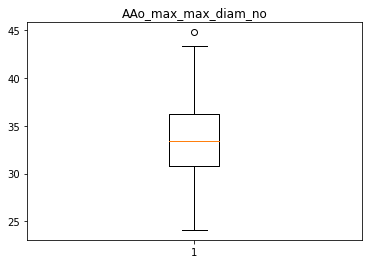

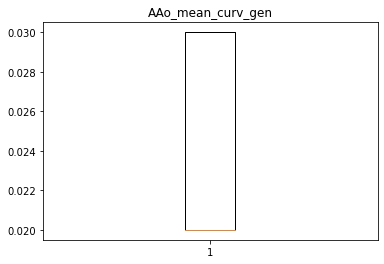

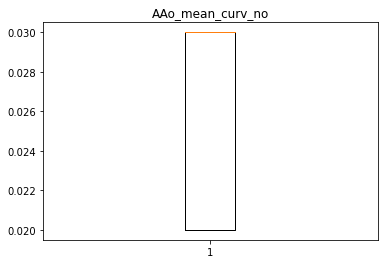

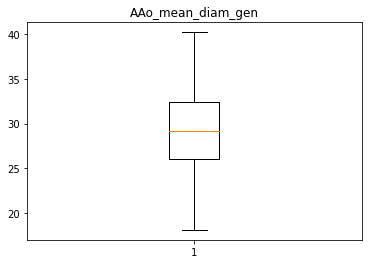

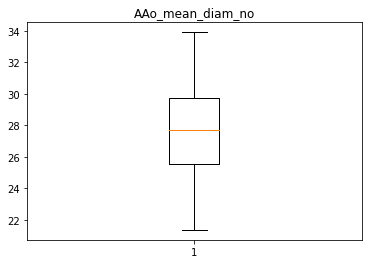

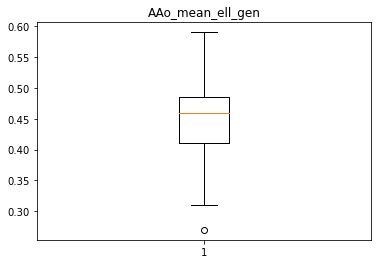

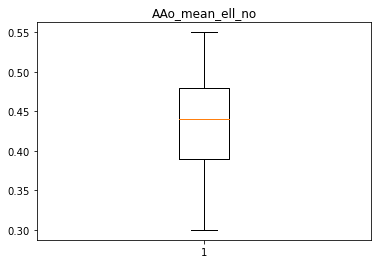

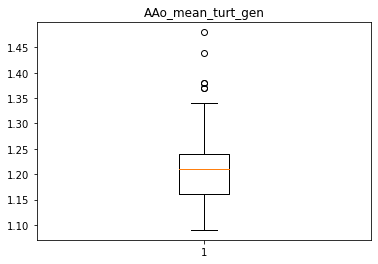

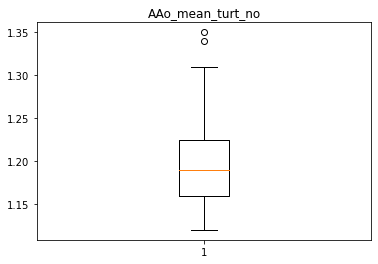

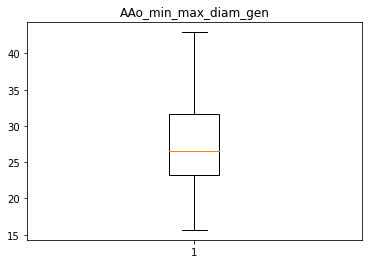

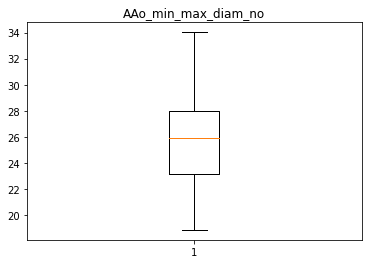

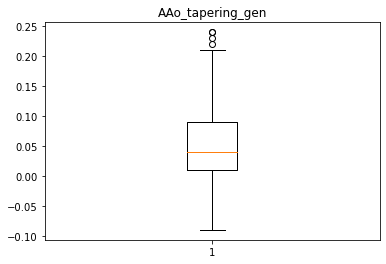

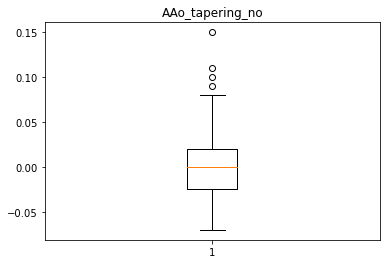

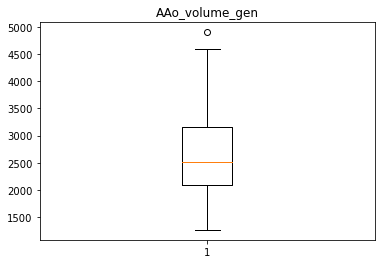

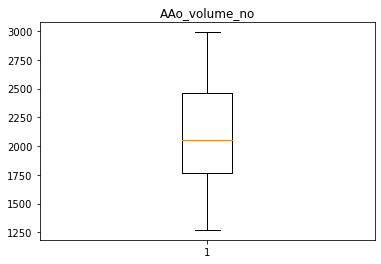

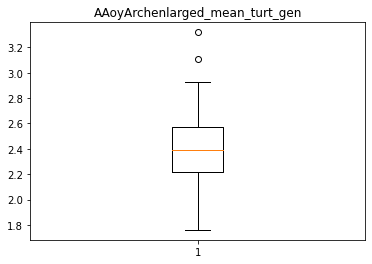

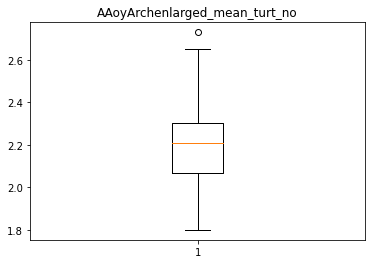

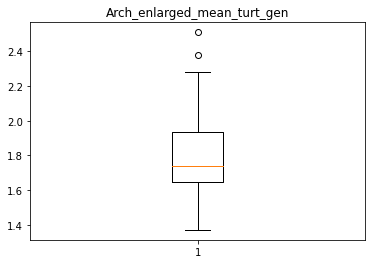

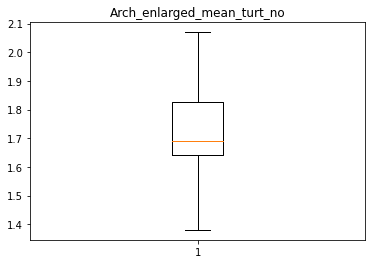

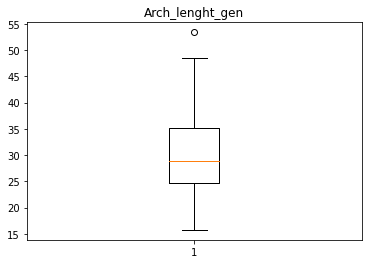

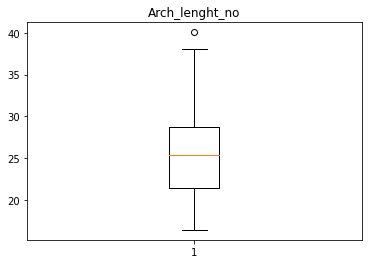

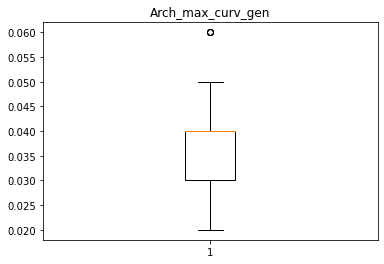

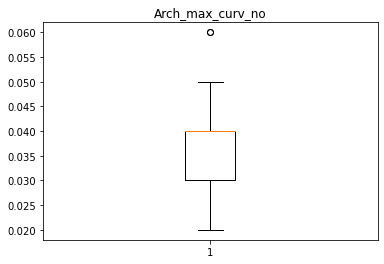

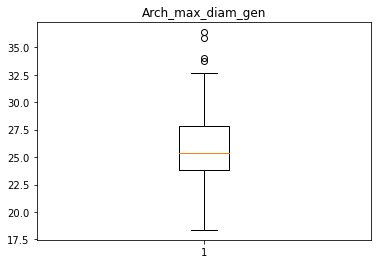

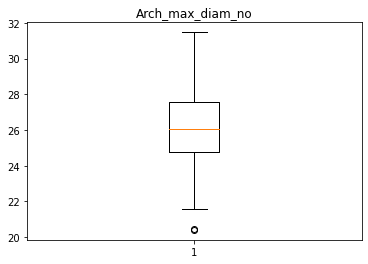

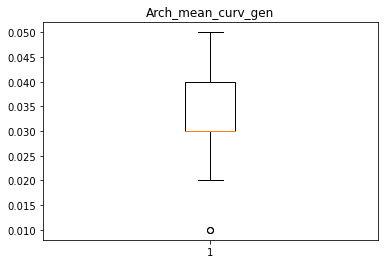

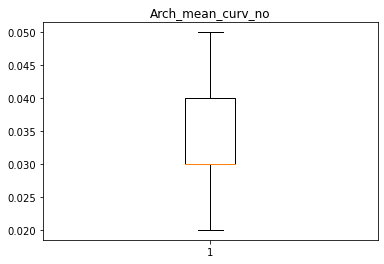

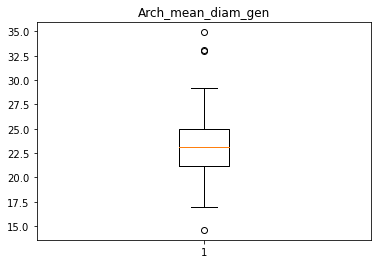

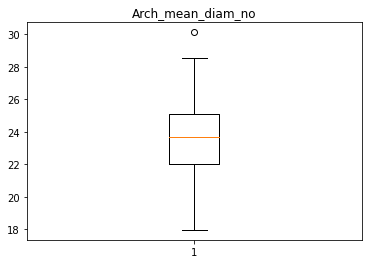

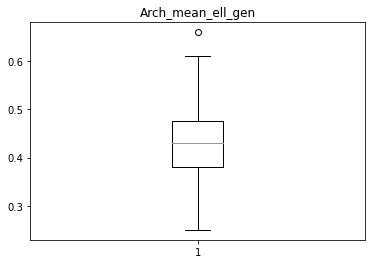

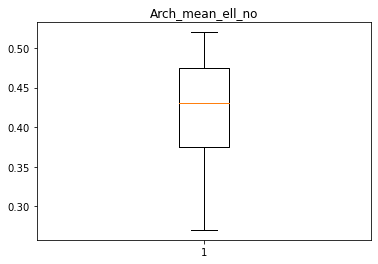

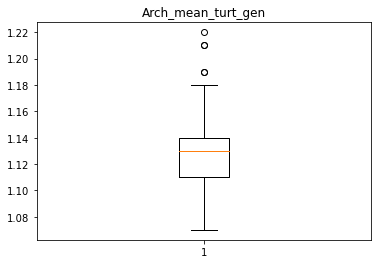

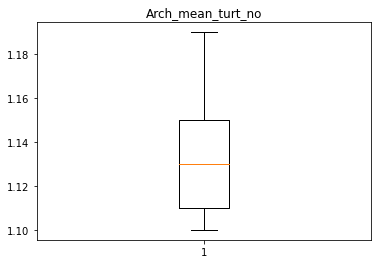

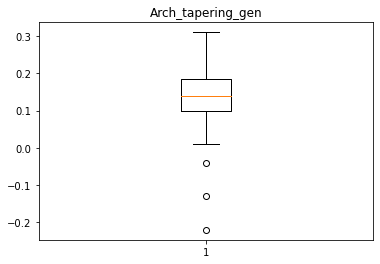

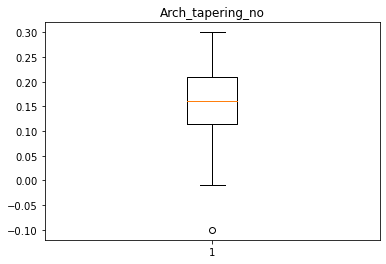

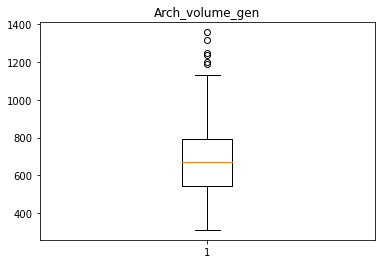

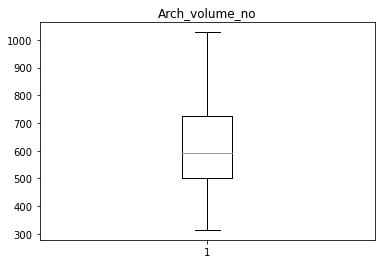

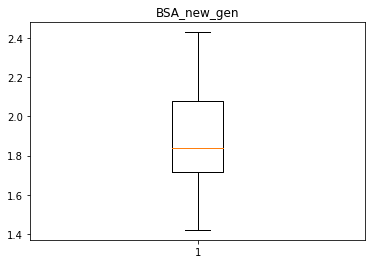

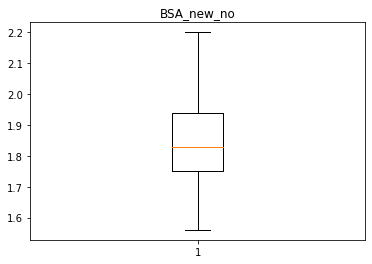

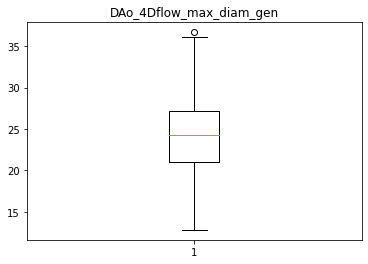

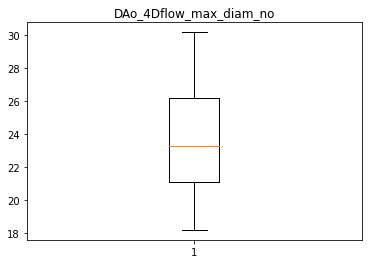

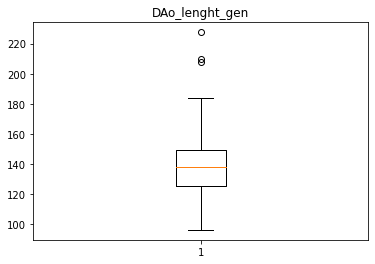

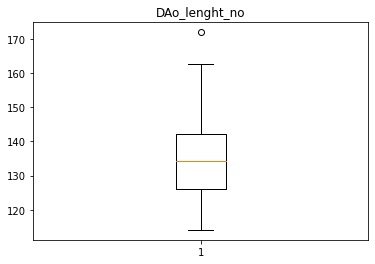

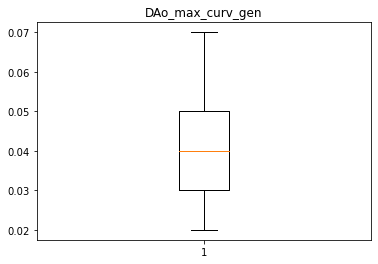

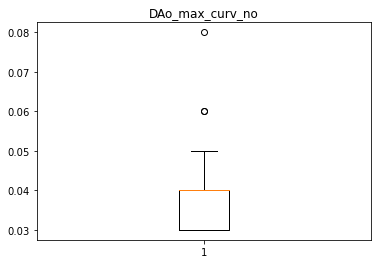

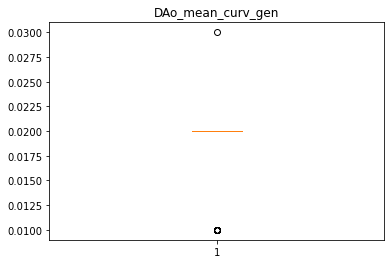

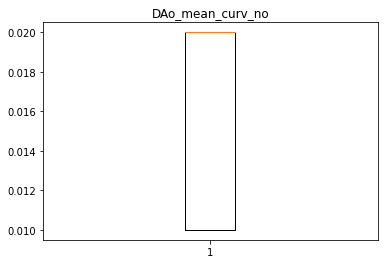

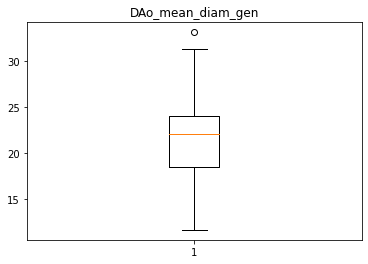

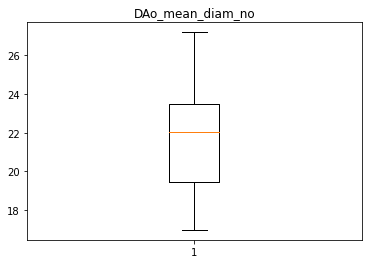

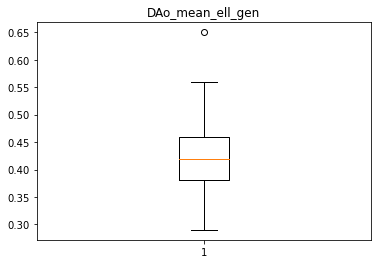

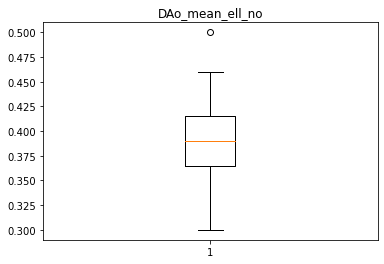

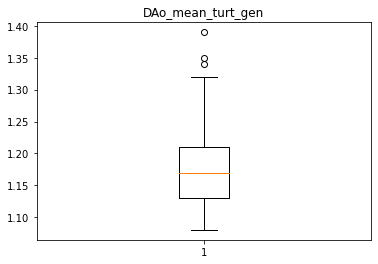

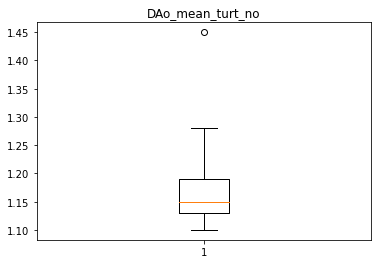

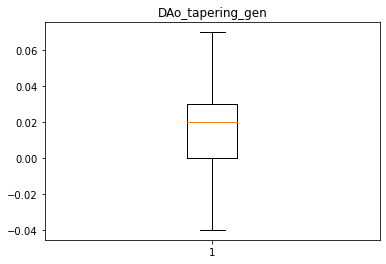

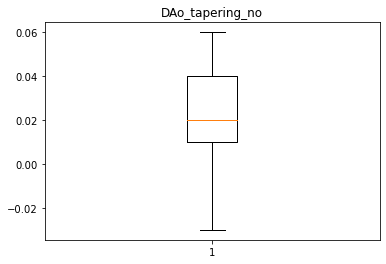

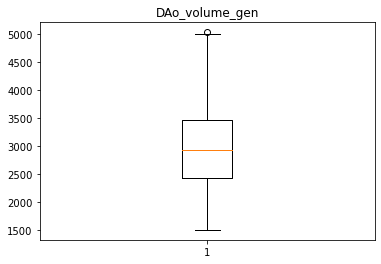

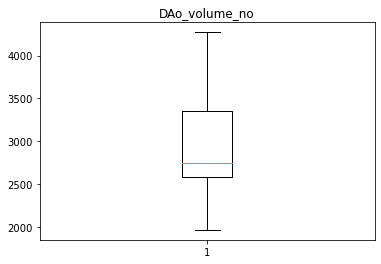

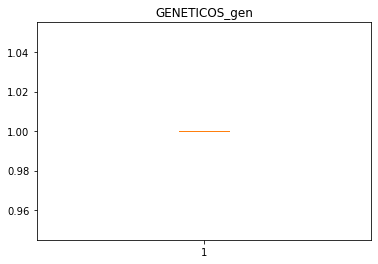

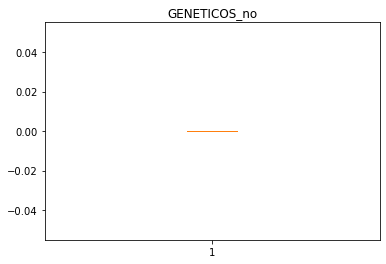

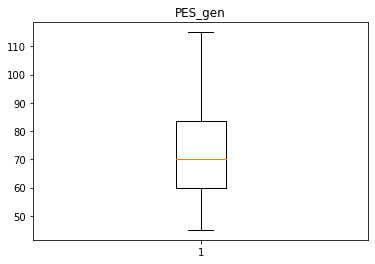

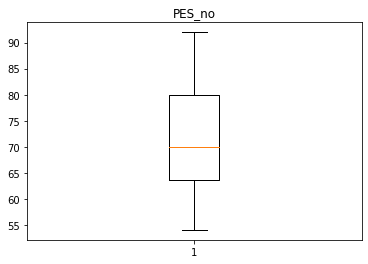

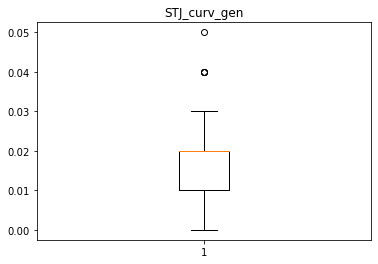

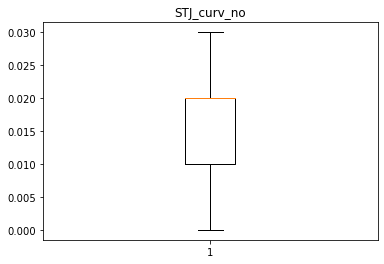

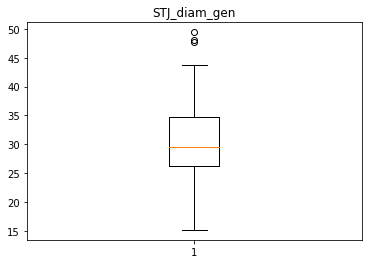

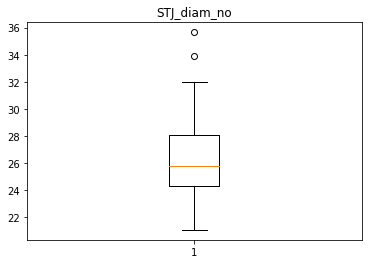

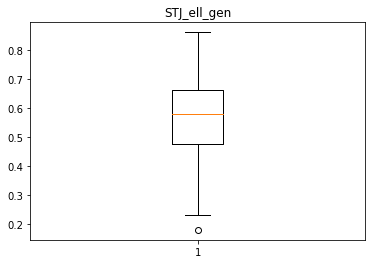

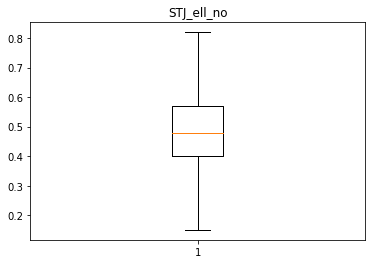

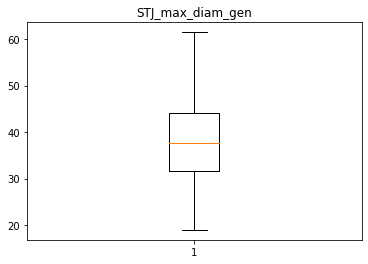

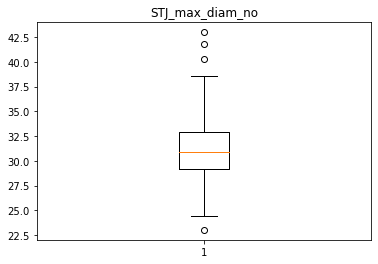

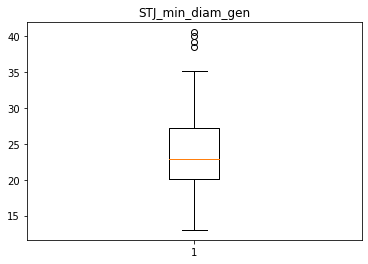

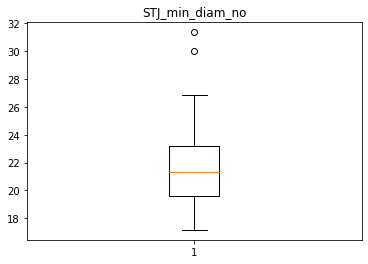

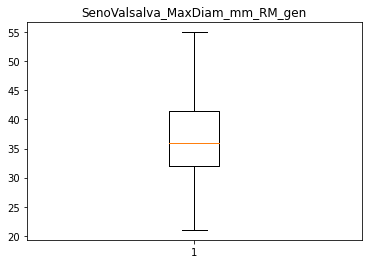

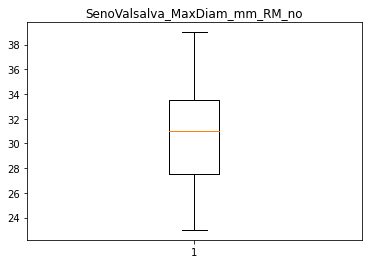

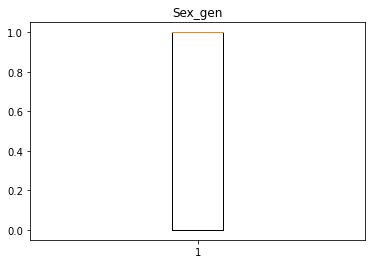

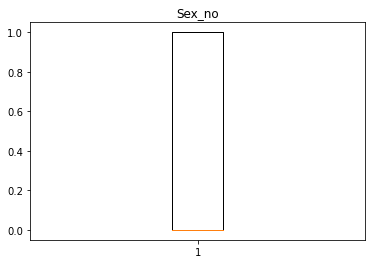

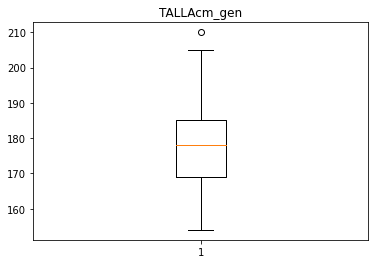

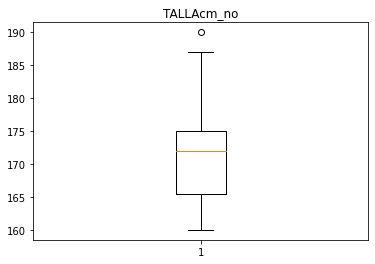

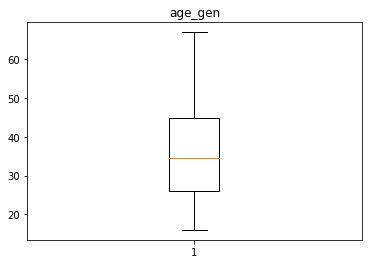

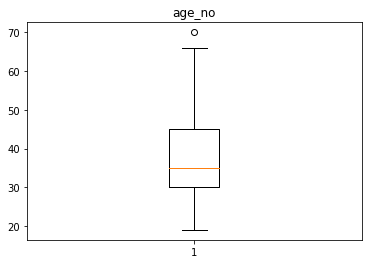

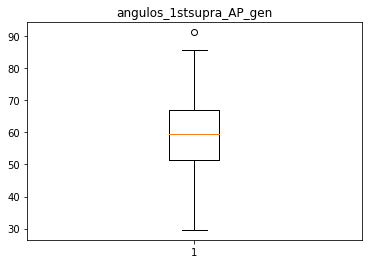

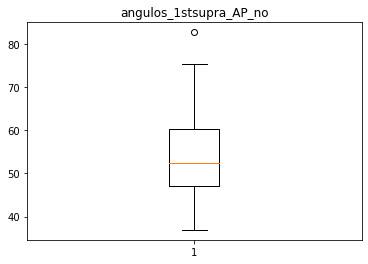

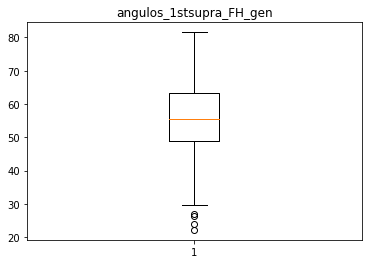

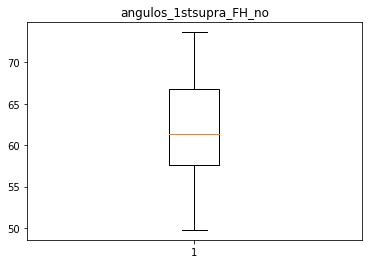

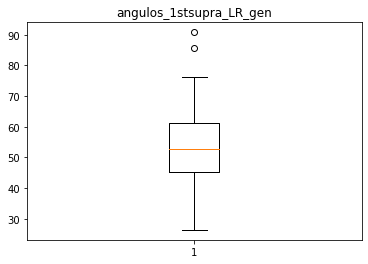

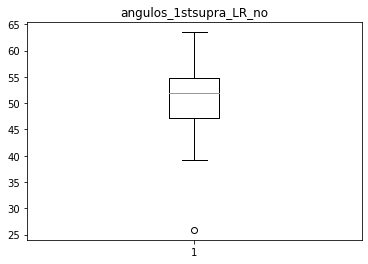

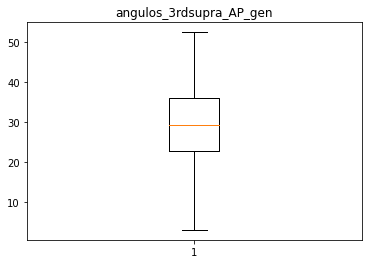

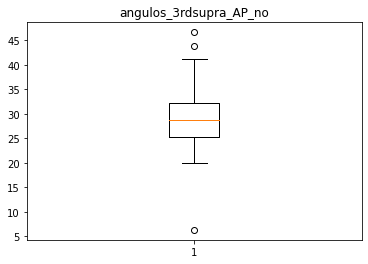

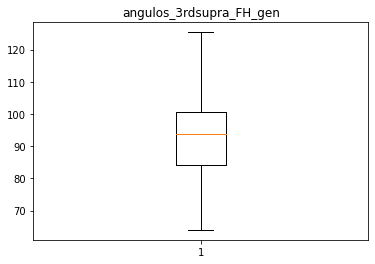

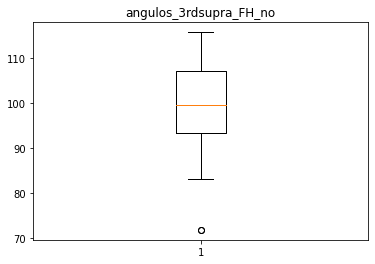

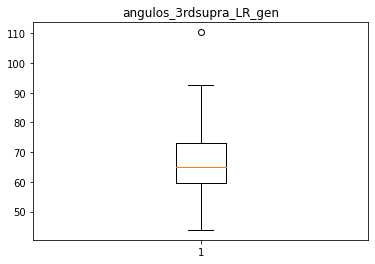

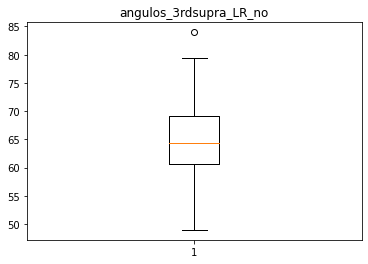

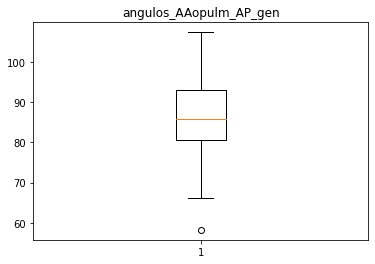

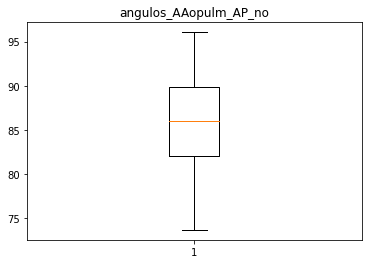

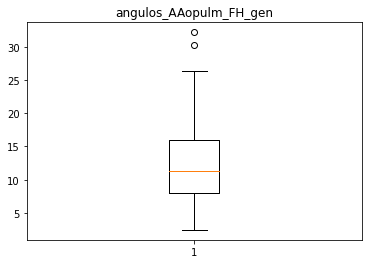

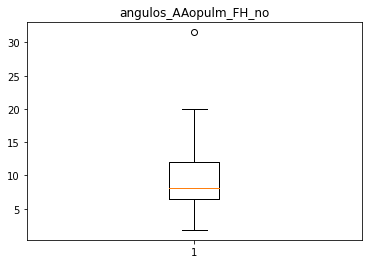

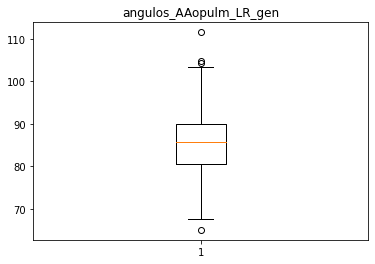

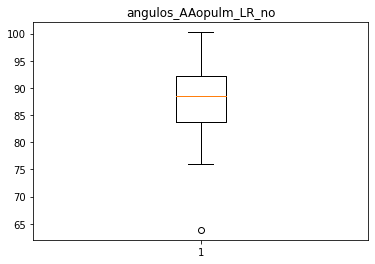

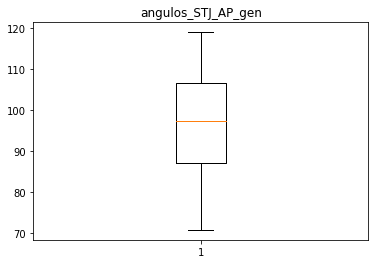

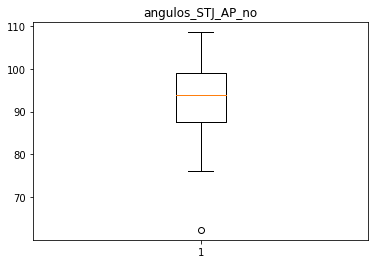

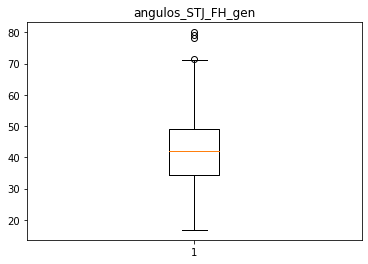

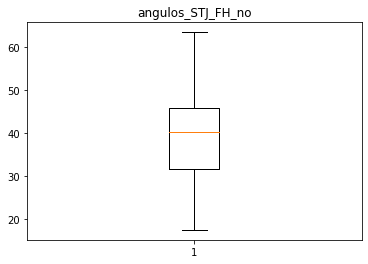

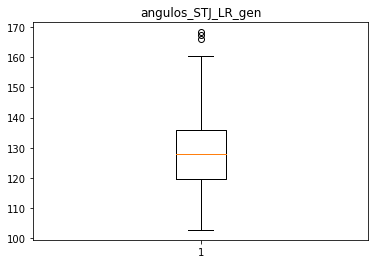

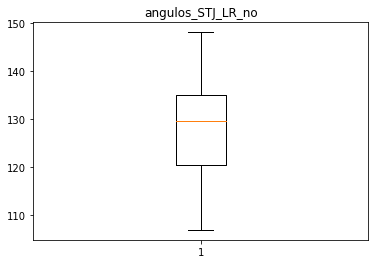

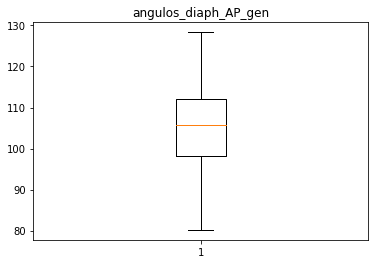

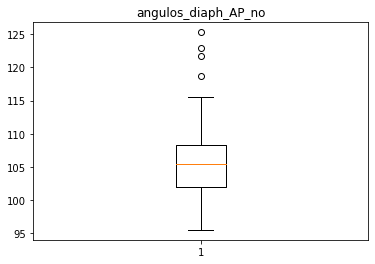

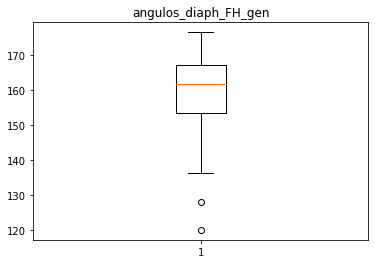

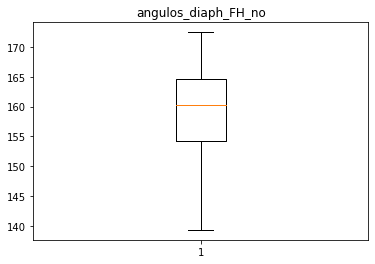

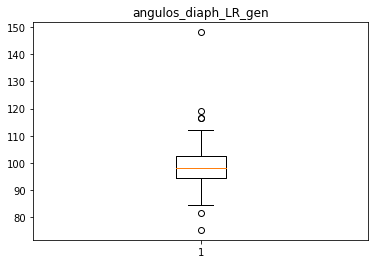

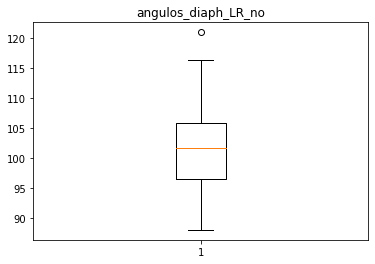

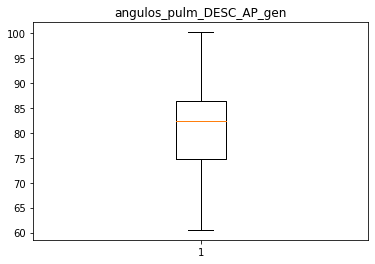

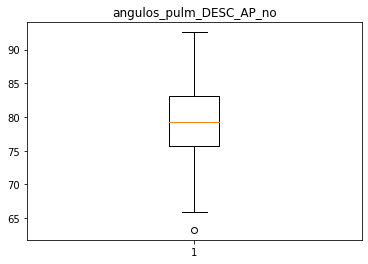

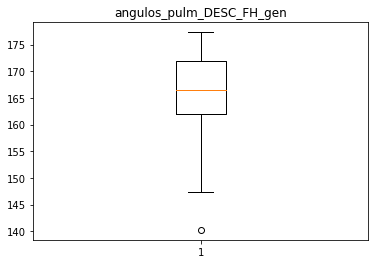

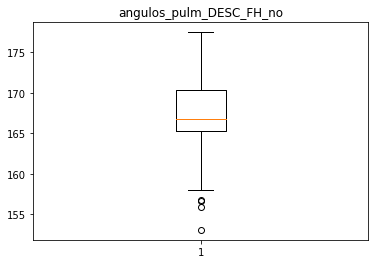

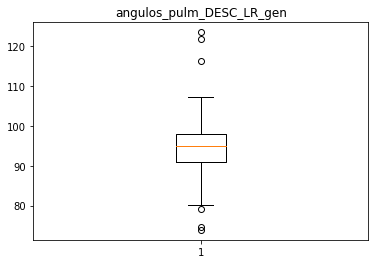

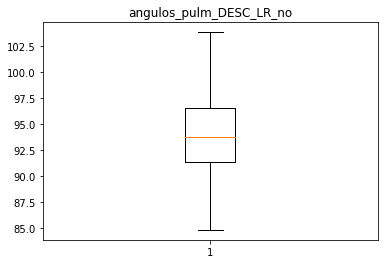

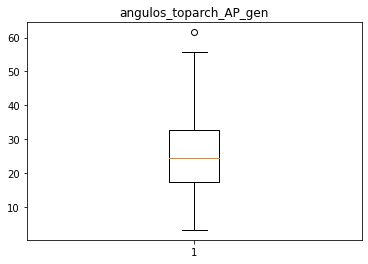

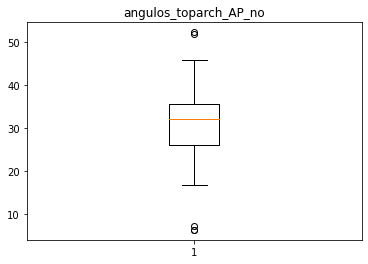

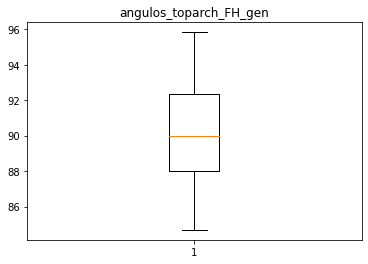

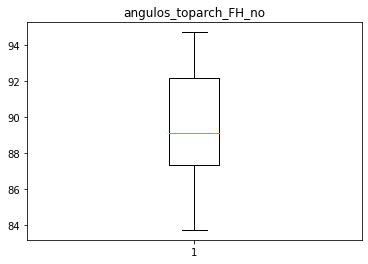

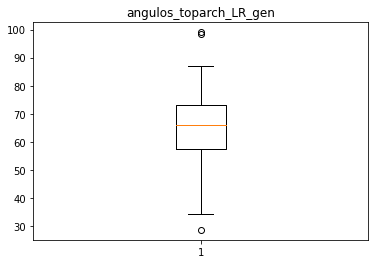

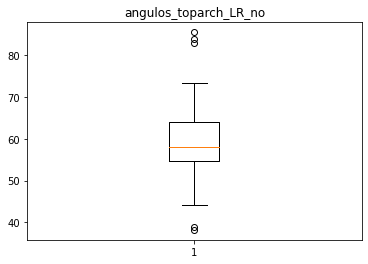

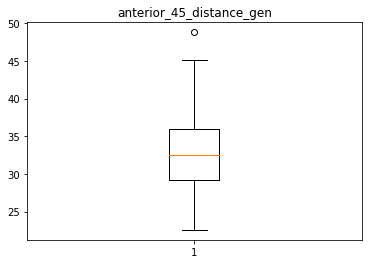

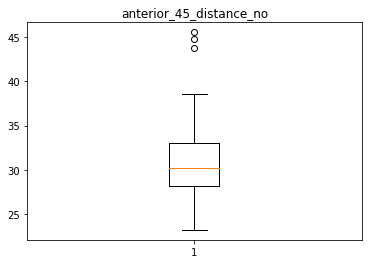

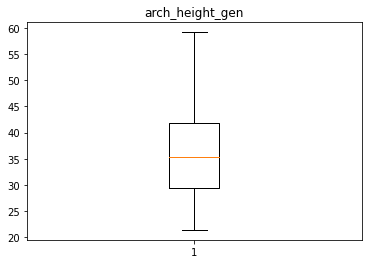

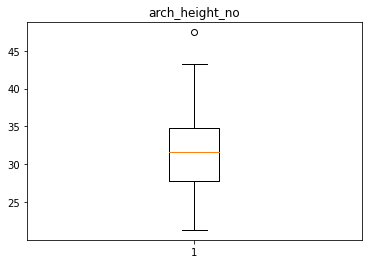

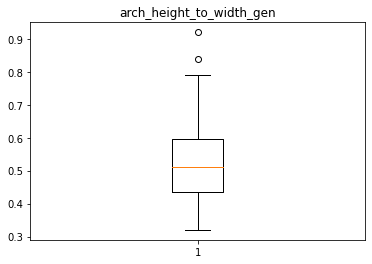

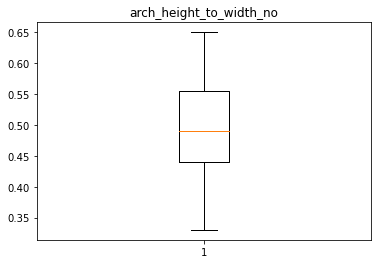

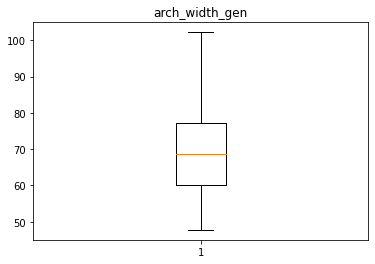

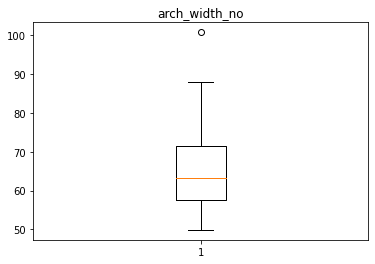

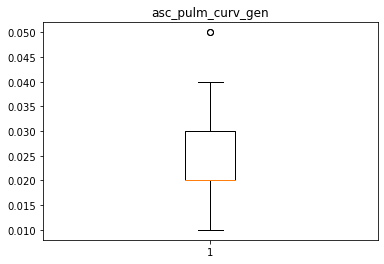

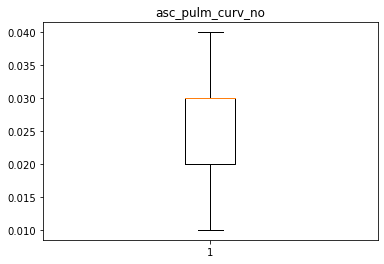

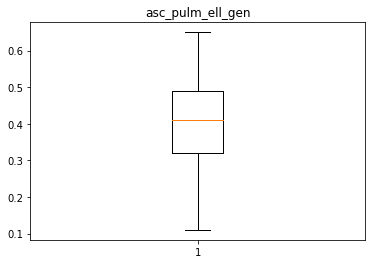

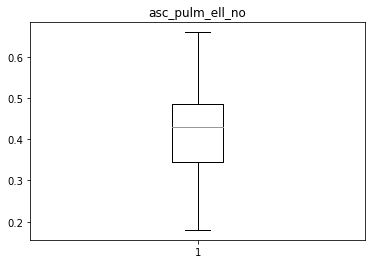

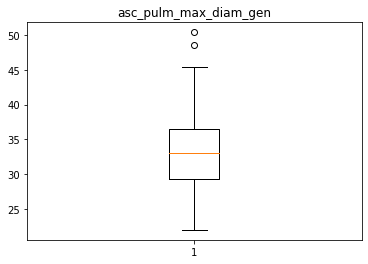

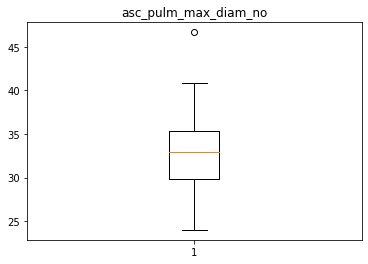

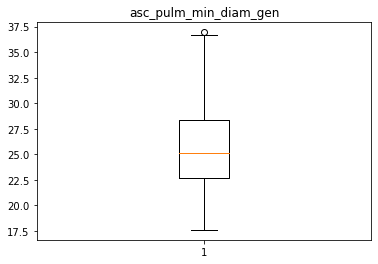

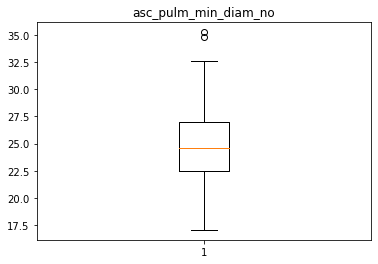

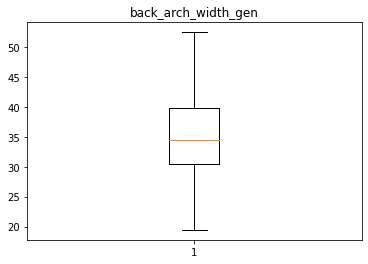

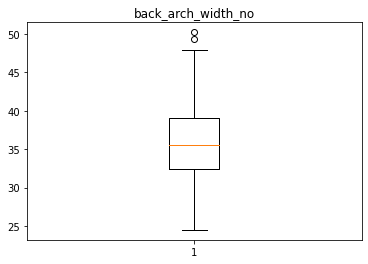

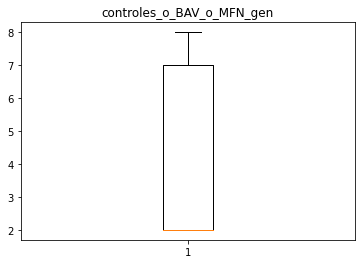

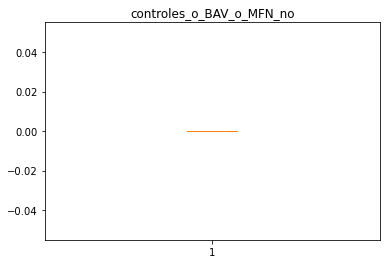

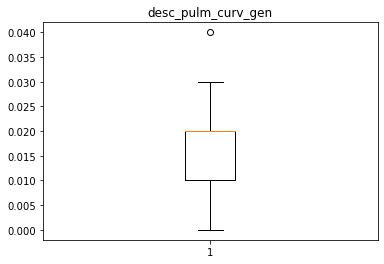

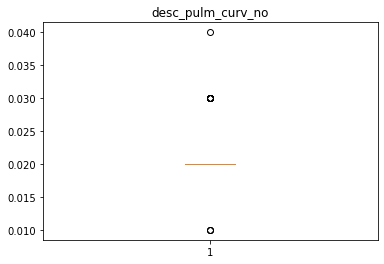

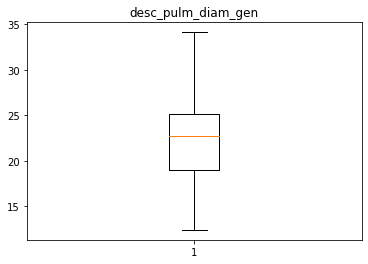

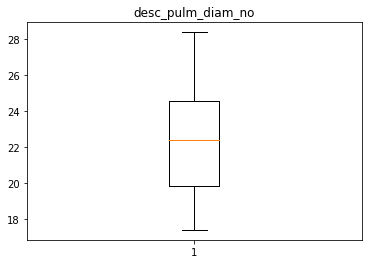

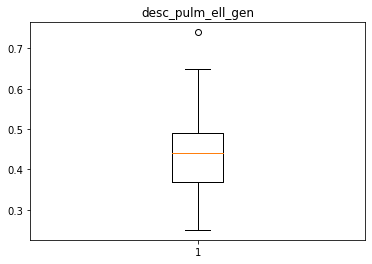

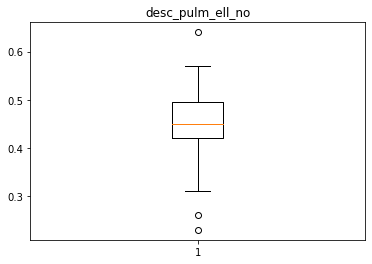

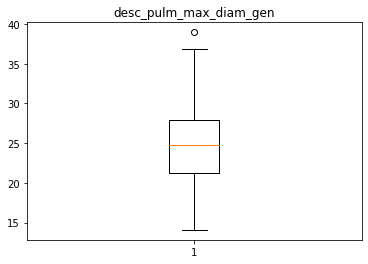

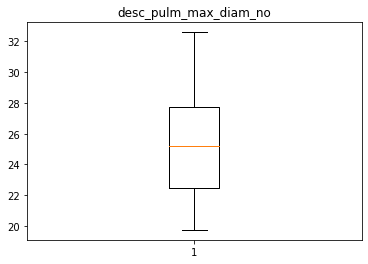

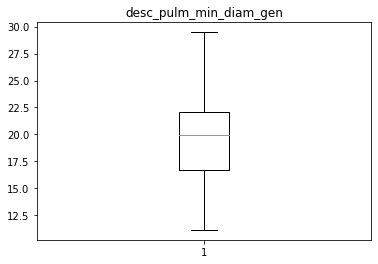

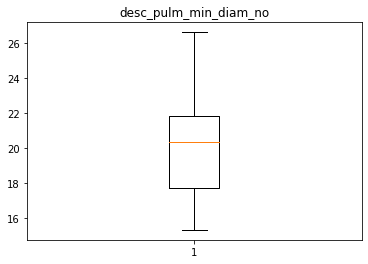

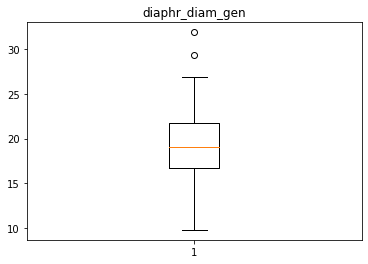

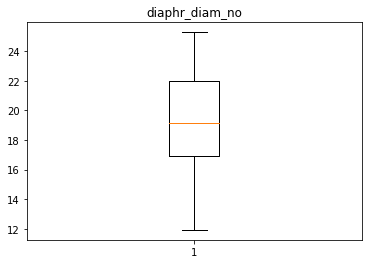

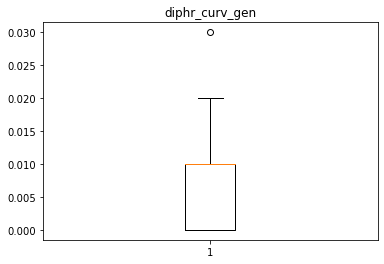

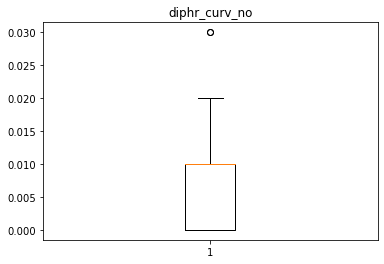

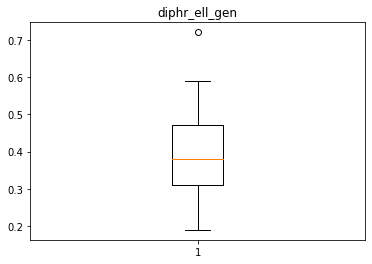

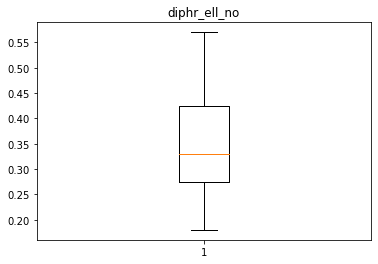

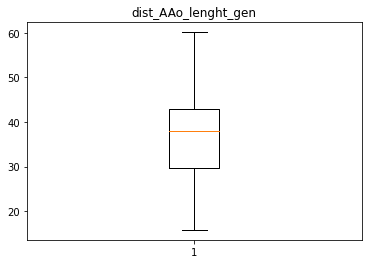

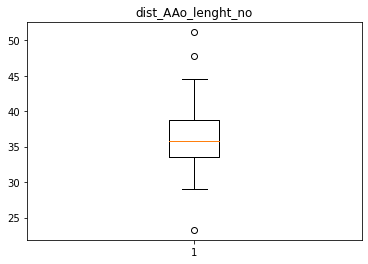

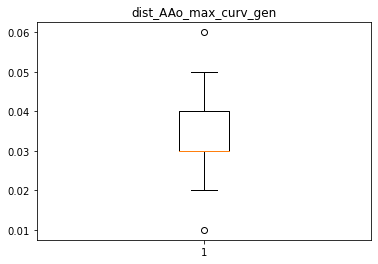

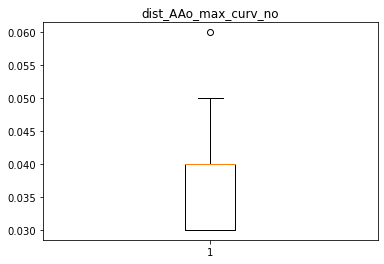

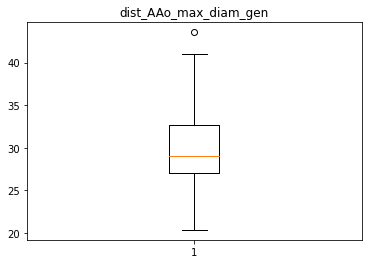

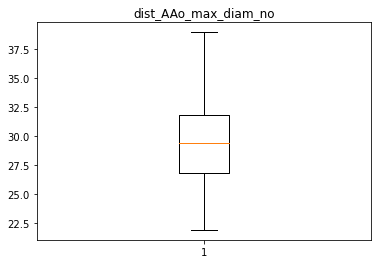

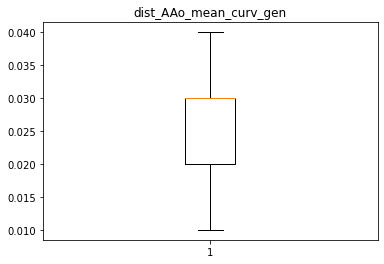

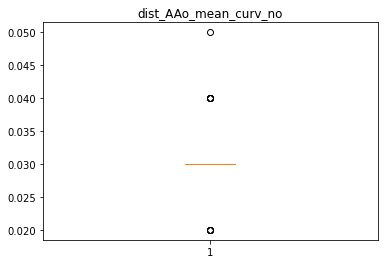

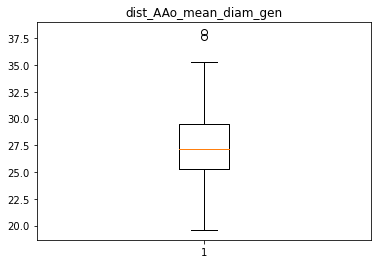

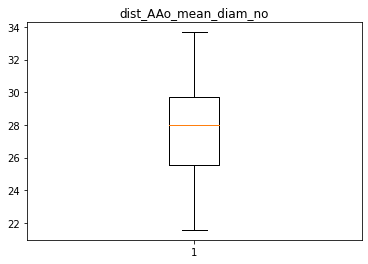

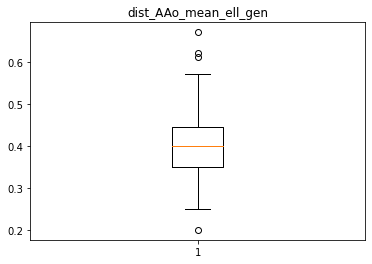

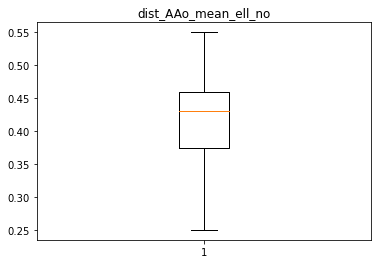

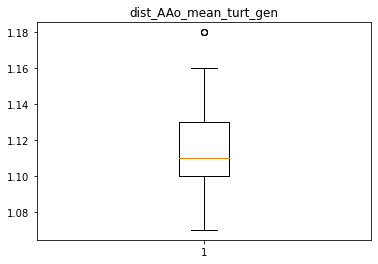

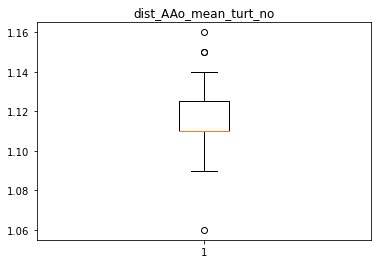

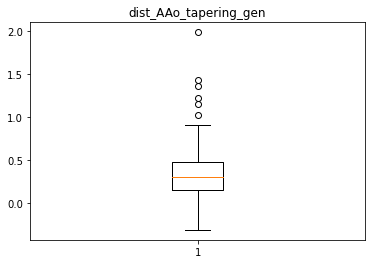

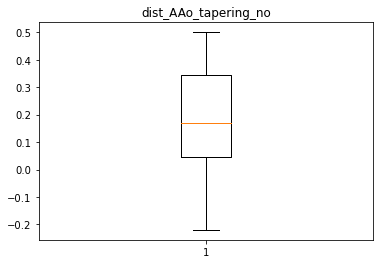

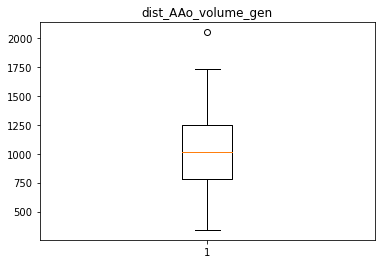

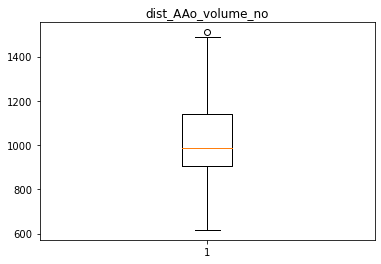

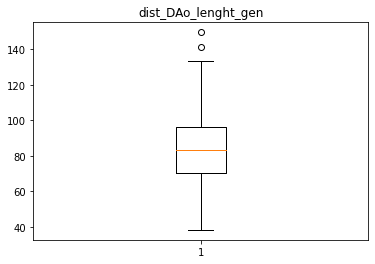

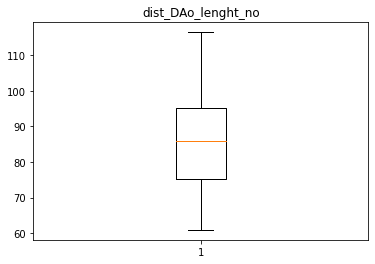

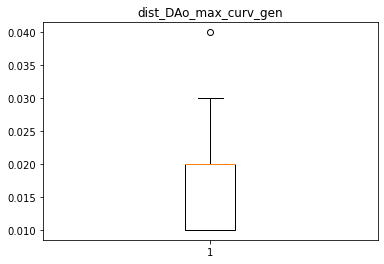

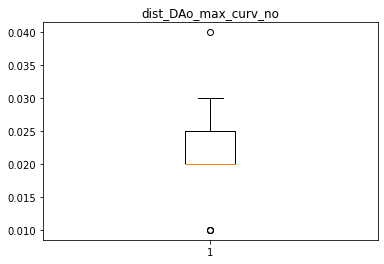

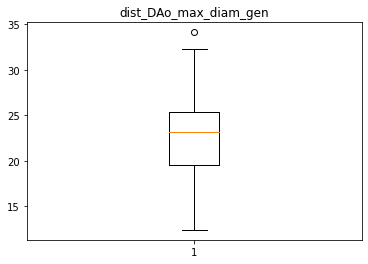

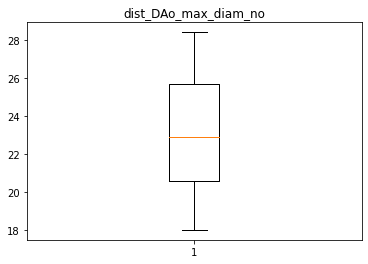

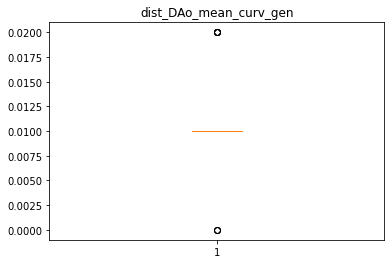

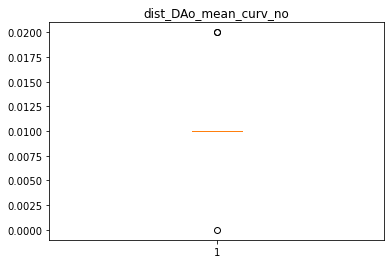

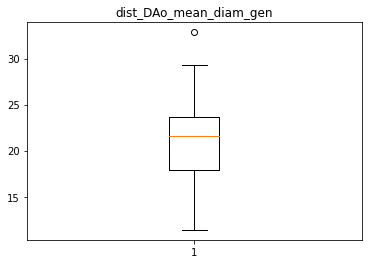

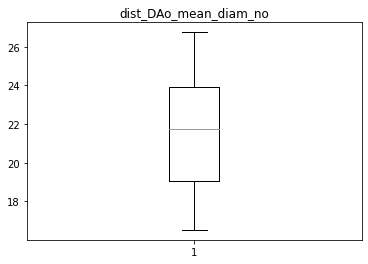

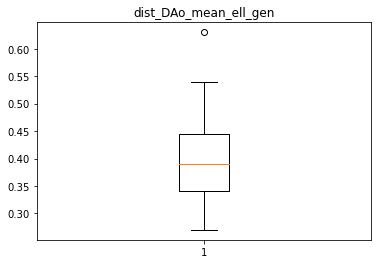

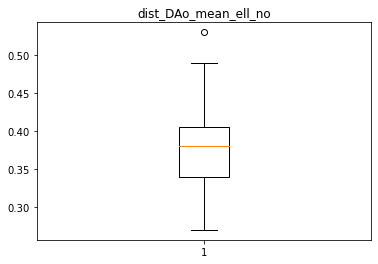

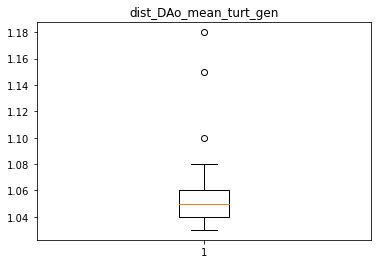

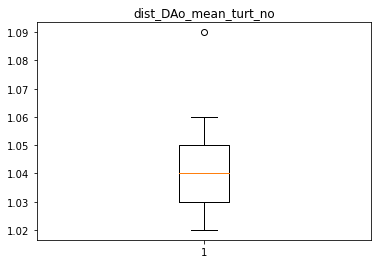

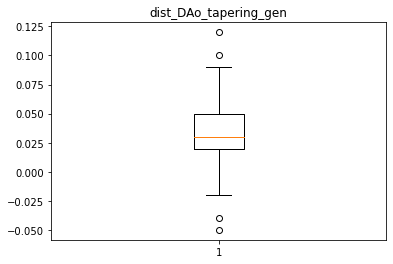

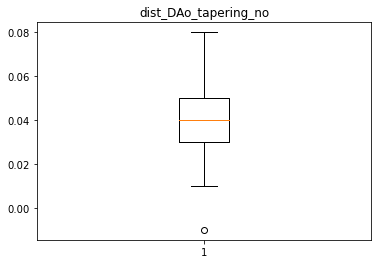

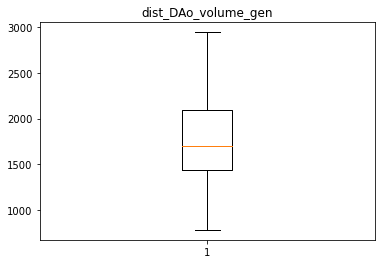

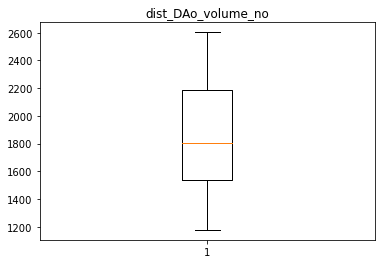

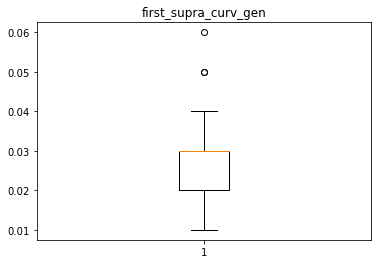

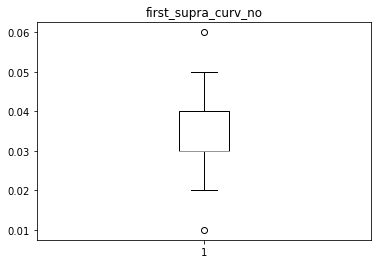

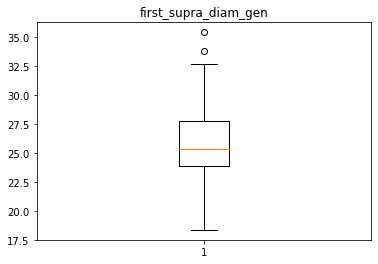

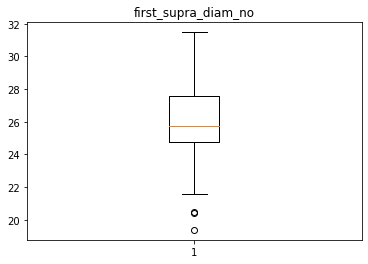

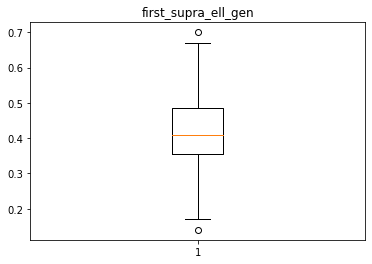

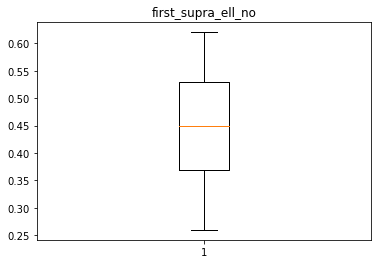

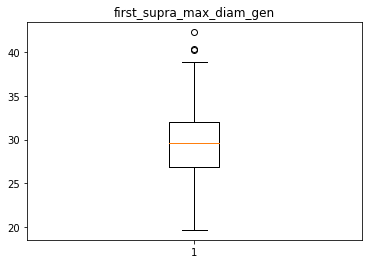

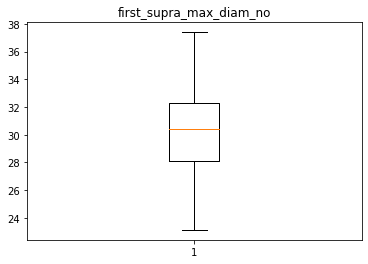

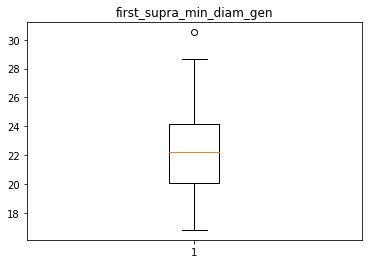

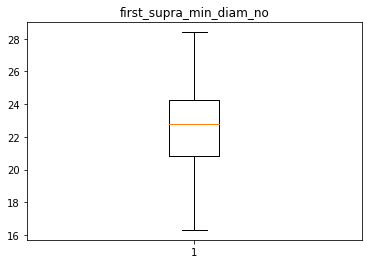

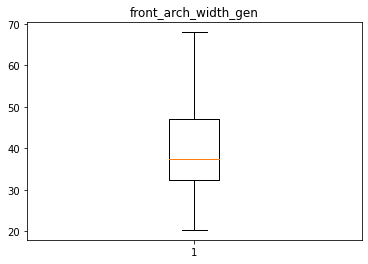

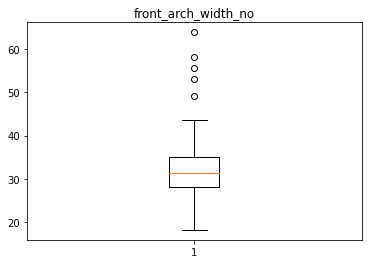

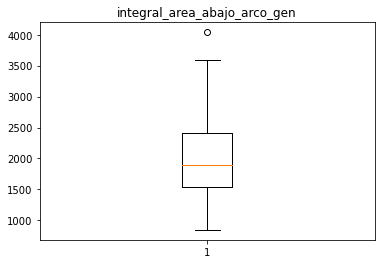

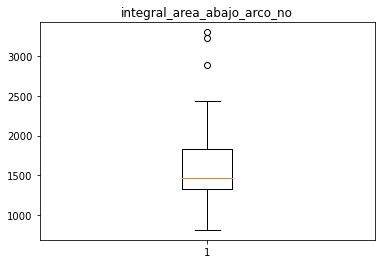

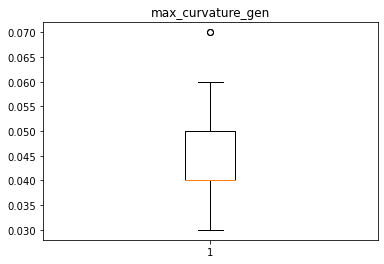

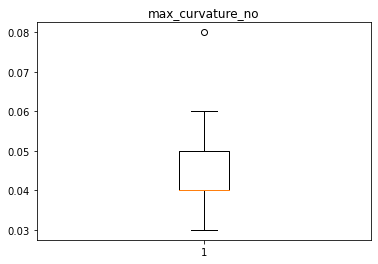

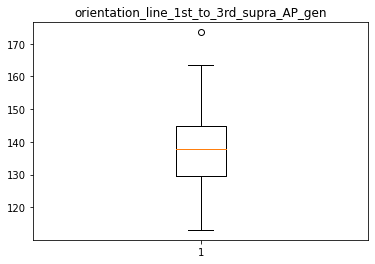

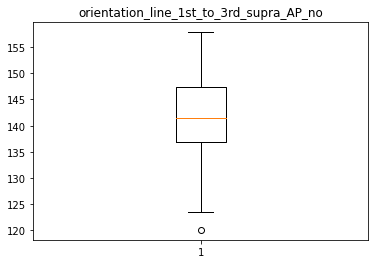

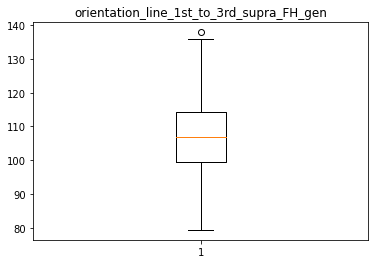

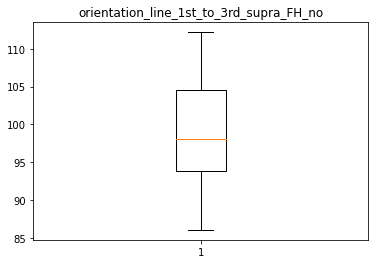

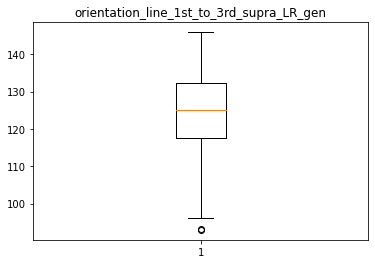

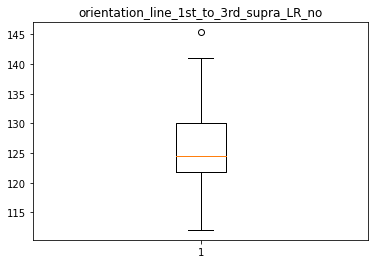

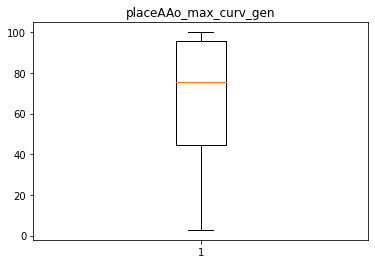

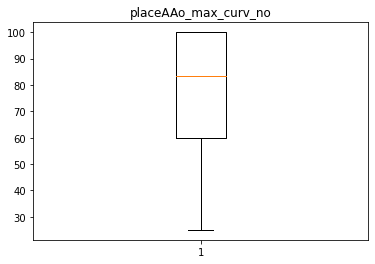

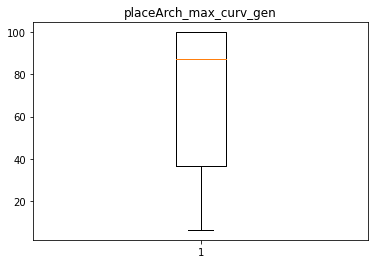

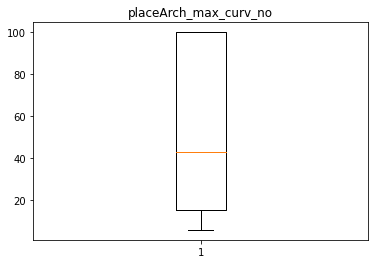

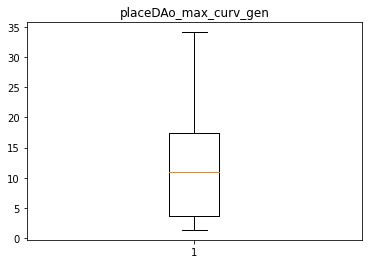

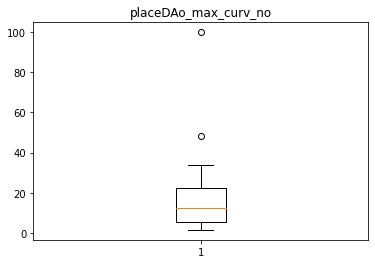

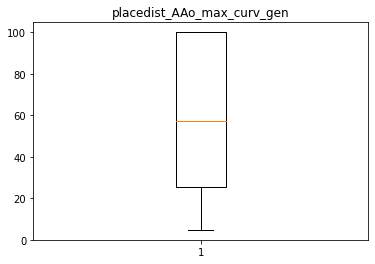

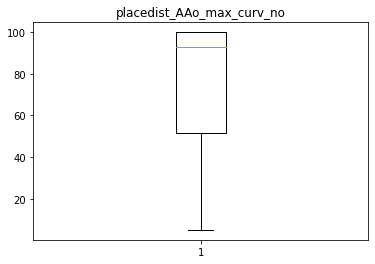

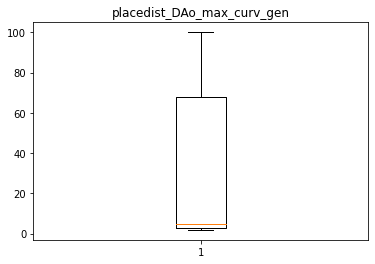

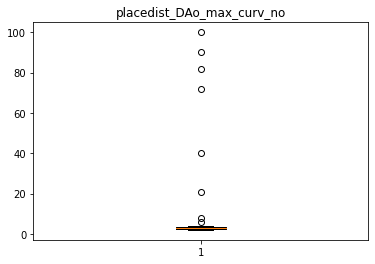

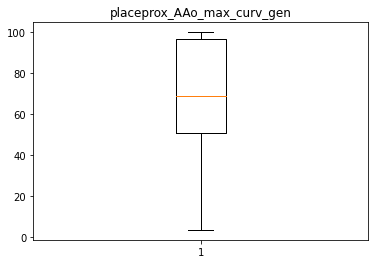

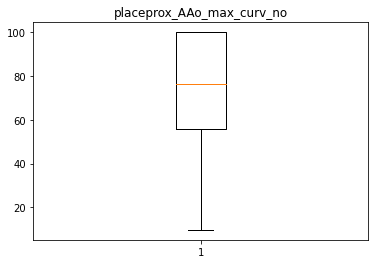

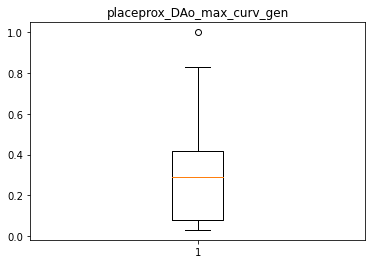

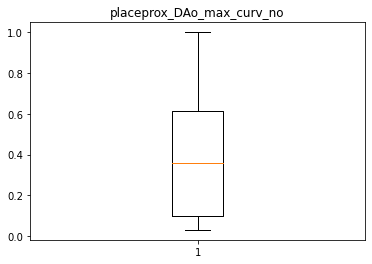

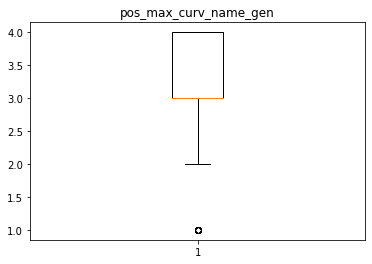

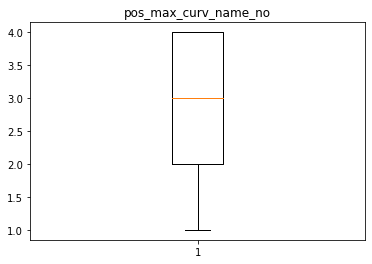

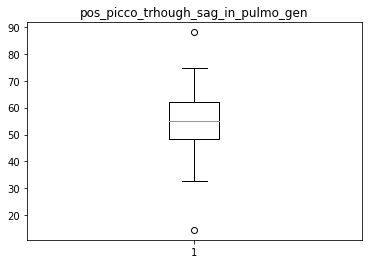

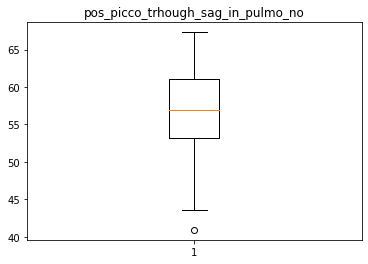

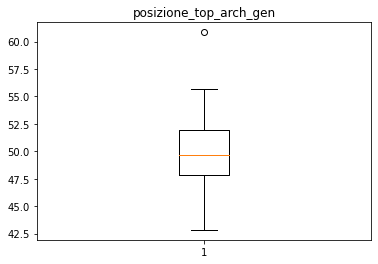

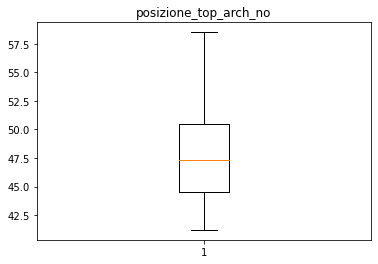

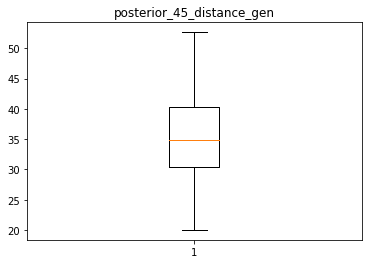

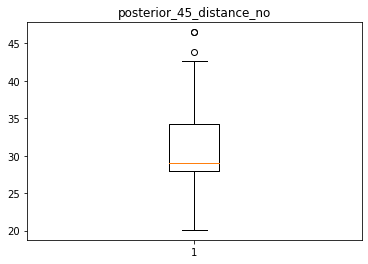

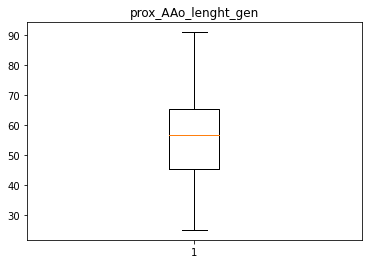

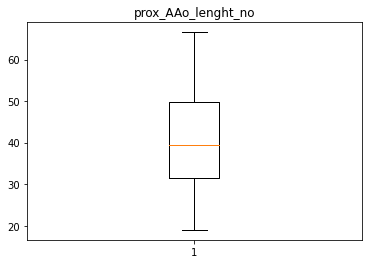

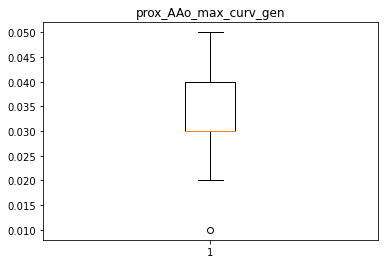

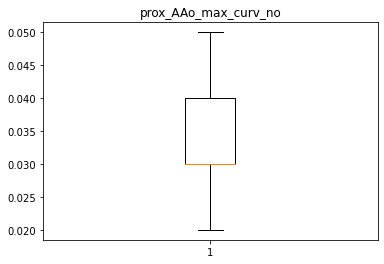

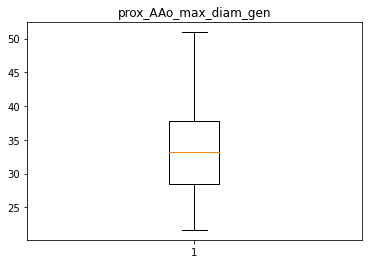

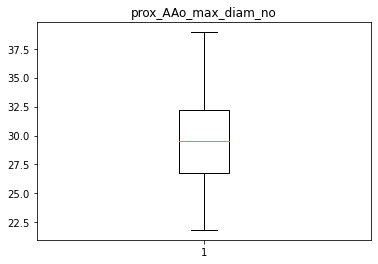

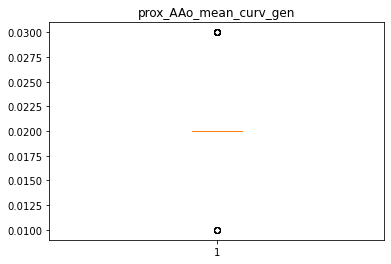

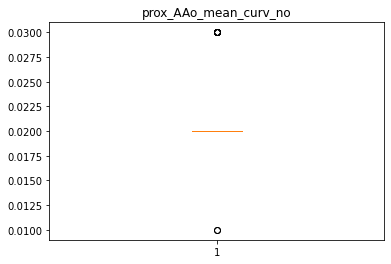

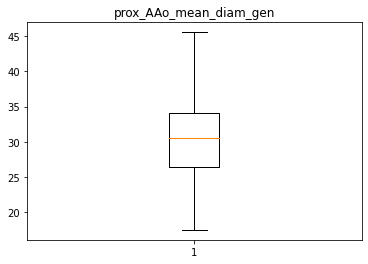

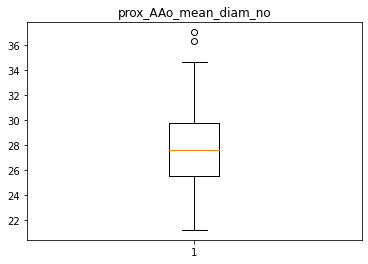

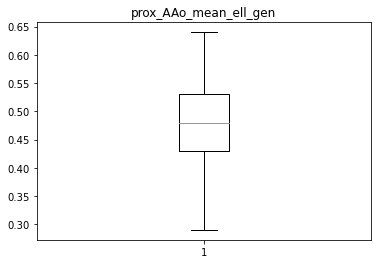

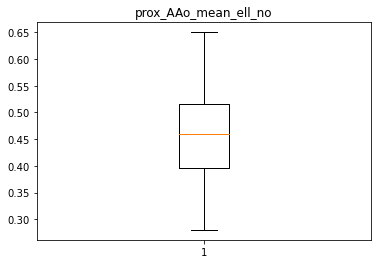

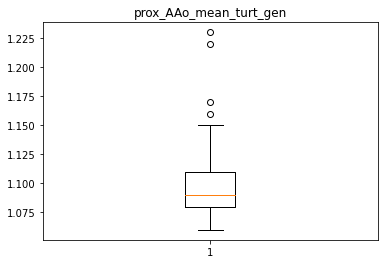

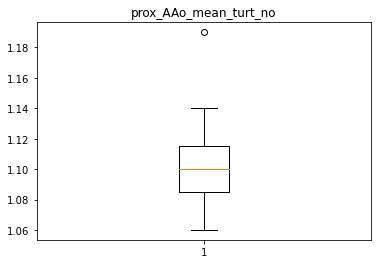

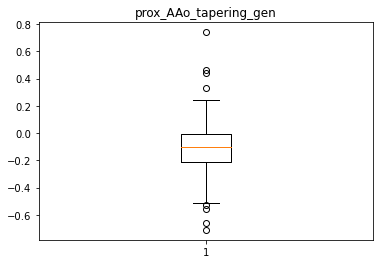

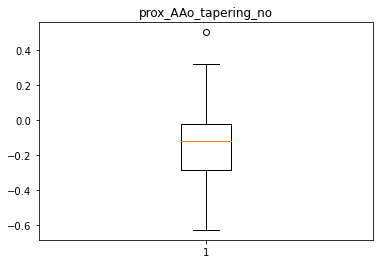

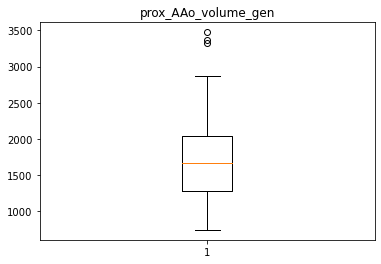

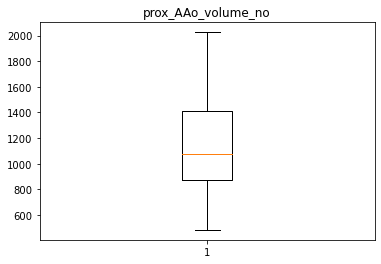

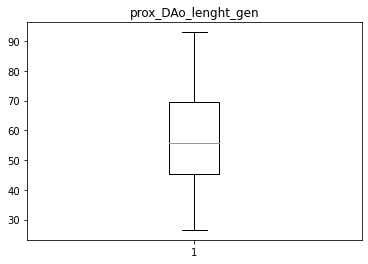

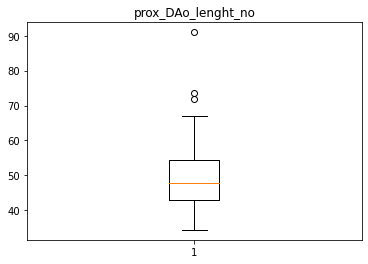

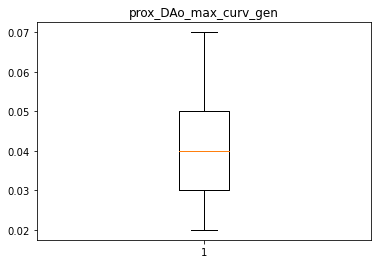

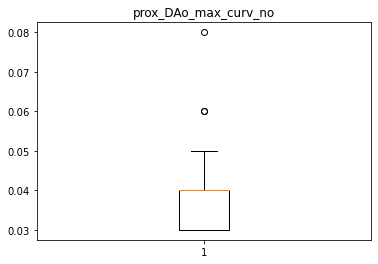

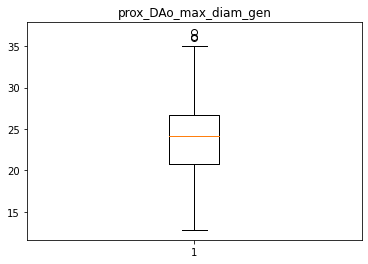

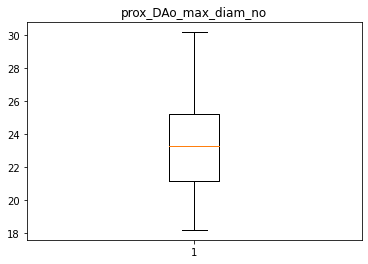

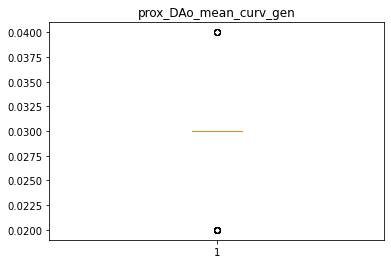

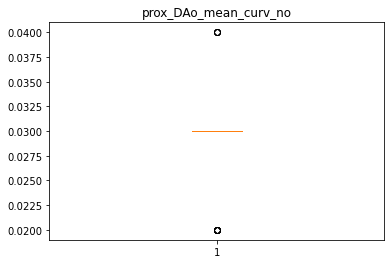

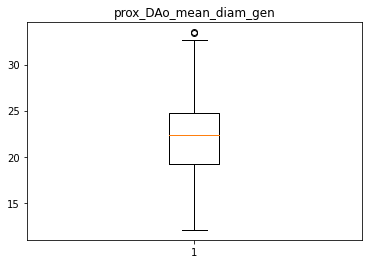

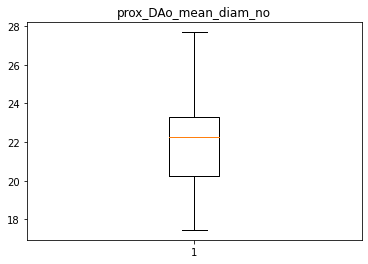

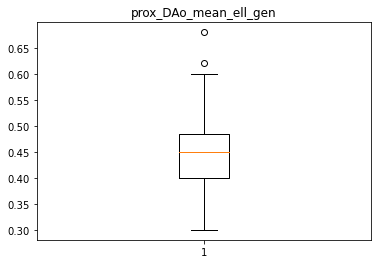

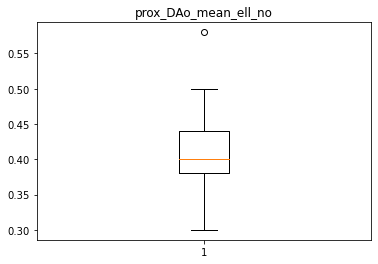

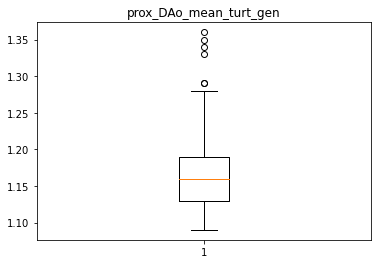

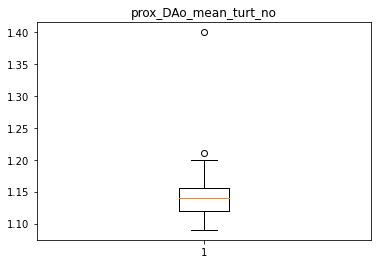

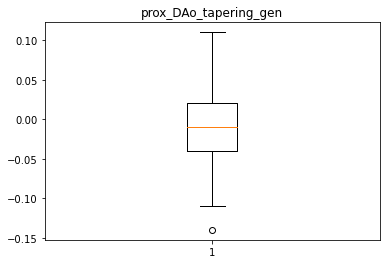

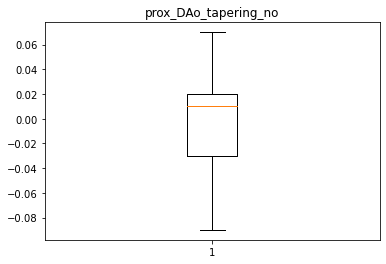

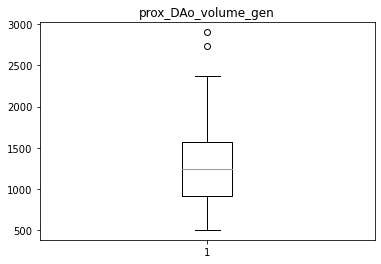

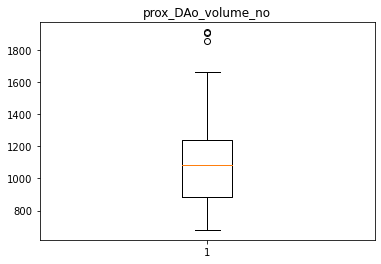

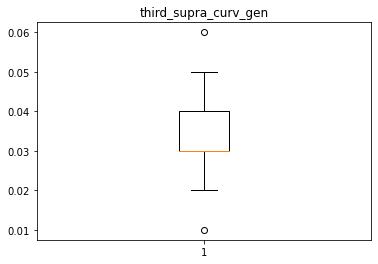

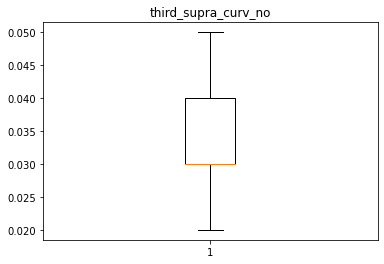

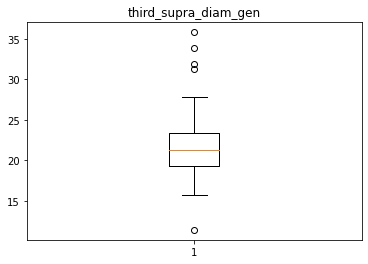

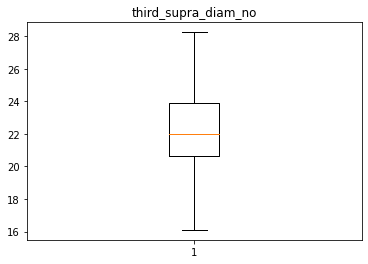

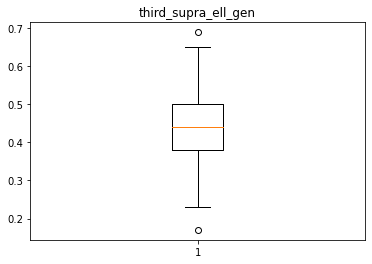

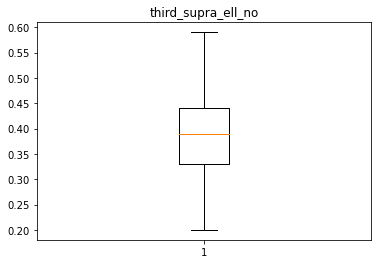

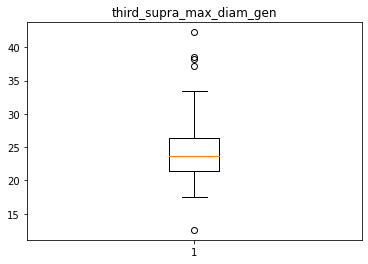

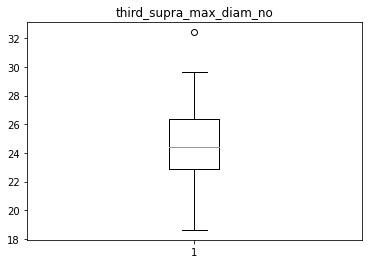

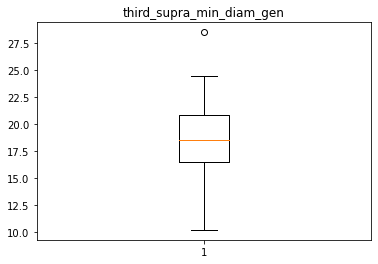

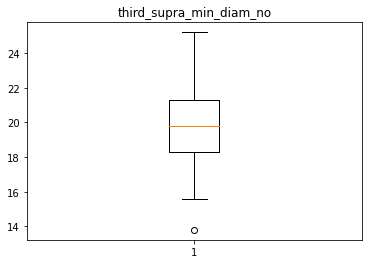

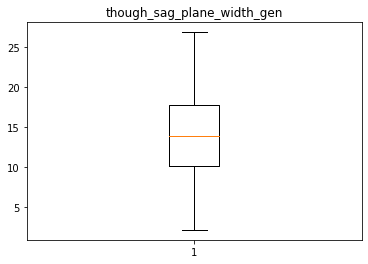

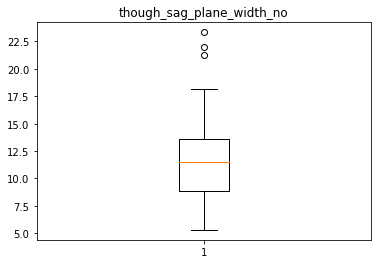

In [19]:

for col in columns:
    plt.figure()   # plots figure for each iteration
    try:
        plt.boxplot(df1_no_gen[col])
        plt.title(col)
    except:
        plt.boxplot(df1_gen[col])
        plt.title(col)
    

Observando la distribución entre genéticos y no géneticos a simple vista hemos visto:

- En general valores de medias más altas en las variables AA en los Genéticos.

- Vemos outliers en algunas variables como arch_max_dian_gen, arch_mean_turu, arch_volume, DA0_lenght...

- Una media más alta en DAo_mean_ell, STJ_max_diam, TALLAcm, ANGULOS_1STsupra_AP, angulos_AAopulm_FH, asc_pulmo_curv...

- Y lo más sorprendente que en el grupo genético parace que la gran mayoría son de sexo 1 y en la de control la mayoía de tipo 0.